<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [2]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

(100, 100, 3)
(100, 100)


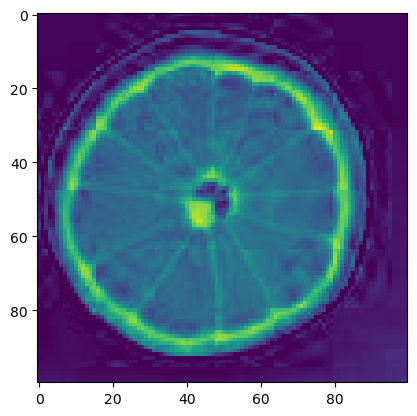

In [71]:
#Print the shape of the image
print(image.shape)

#Create a new variable called img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:,:,2]

#Print the shape of img_single_channel to check that it has the same number of pixels as the original image
print(img_single_channel.shape)

#Use plt.imshow to plot img_single_channel
plt.imshow(img_single_channel)

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


Text(0.5, 1.0, 'Single Channel Image')

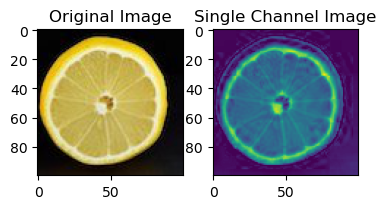

In [83]:
#Create a new variable called img_average_channel that is equivalent to the average of all three color channels of image
img_average_channel = np.mean(image, axis = 2)

#Print the shape of img_average_channel to check that it has the same number of pixels as the original image
print(img_average_channel.shape)

#Use plt.imshow to plot the original image in image
plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Original Image")

#compare the result with the result of Part 1
plt.subplot(2,3,2)
plt.imshow(img_single_channel)
plt.title("Single Channel Image")

The image in the part 2 looks real and Natuaral than the image in the part 1 as it is displaying only single channel (Blue) image.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

Part 3: 
1. Identity matrix is a square matrix having one's(1) top left to right bottom diagonally and rest of the matrix elements are zero's(0).
Also, Multiplying a matrix with identity matrix will result the same matrix

In [87]:
#Create an identity matrix called identity_matrix that has the same size as img_average_channel.
identity_matrix = np.identity(100)

#Print a random row out of identity_matrix and describe your observations.
random_row = np.random.randint(img_average_channel.shape[0])  # Generate a random row index
print(identity_matrix[random_row, :])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Part 3:
3. Random row has all zero's except the single element which is '1'

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [52]:
#create a numpy array that contains the numbers  0,1,⋯,𝑁
arr = np.arange(100)

#Use numpy.random.shuffle to shuffle the indices. Call the shuffled array, rows
np.random.shuffle(arr)

#Print rows and inspect the elements.
print(arr)

[47  3 16 38 14 28 29 91 21 26 46 34 78 33 58 12 20 51 92 54 52 61 98 66
 62  6 40 11 45 68 99 59 85  8 19  0 48 86 95  2 75 60 72 76 44 93  9 90
  5 55 84 35 57 73 56 22 31 83 97 15 89 77 81 63 64 67 42 18 96 49 36 53
 65  1 70 69 88 80 50 94 32 79 43 27 10 23 39 13 87 37  4 25 82 24 41 30
 71 17 74  7]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [93]:
T = identity_matrix[arr]

print(T.shape)

if T.shape != identity_matrix.shape or T.shape != img_average_channel.shape:
    T = T.reshape(identity_matrix.shape)
    print("Reshaping T")
else:
    print("T has the same shape")

(100, 100)
T has the same shape


Part 5:
2. T has the same elements as identity matrix with shuffled rows

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

(100, 100)


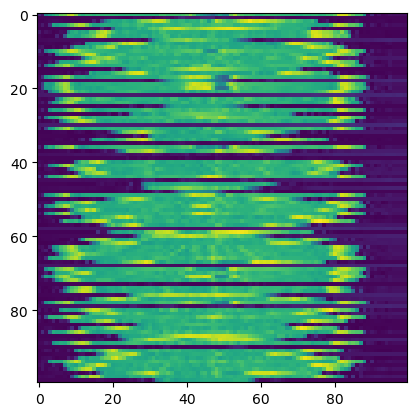

In [104]:
transformed_image = np.dot(T,img_average_channel)
print(transformed_image.shape)
plt.imshow(transformed_image)

Part 6:
3. Rows of the original image are changed after multiplication of T with image average channel where the rows are shuffled resulting in a new image with shuffled rows

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Part 7:
    1. A matrix is invertible if the rows and columns are same and it's determinant must be a non-zero.

Invertible


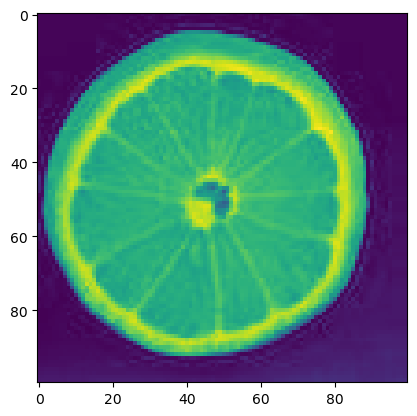

In [94]:

if(T.shape[0] == T.shape[1]) and np.linalg.det(T)!=0:
    print("Invertible")
    
Tinv = np.linalg.inv(T)

plt.imshow(np.dot(Tinv,transformed_image))


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


[91 22 79 51 92 82  0 48 95 86 40 35 63 27 56  1 57 47 28 49 64 14  2 66
 70 96 36 89 65 62 76 73 50 37 55 25 69 75 77 52 45 42 78 93 34 26 41 10
 94 24 59 31  8 85 90 46 15 39 74 30 18 13  5 43 16 67 32 83 84 60 29 58
 20 81 88 68 97 71 23  6 11 61  4 99 98 87  7 33 17 44 54 80 21 19 53  9
 72 12 38  3]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


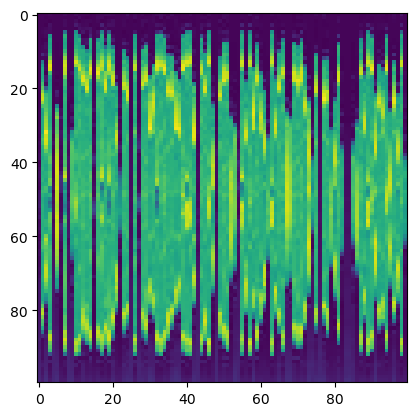

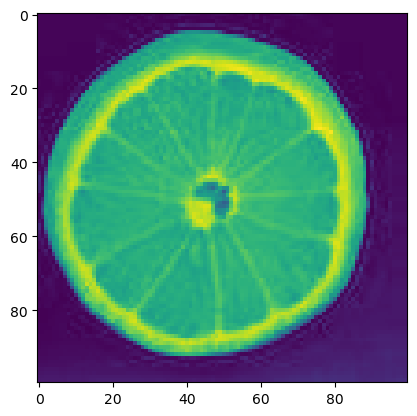

In [103]:
#Shuffling the columns to scramble the image
cols = np.arange(img_average_channel.shape[0])
np.random.shuffle(cols)
print(cols)

T_cols = np.eye(img_average_channel.shape[0])[:, cols]
print(T_cols)

scrambled_image = np.dot(img_average_channel, T_cols)
plt.imshow(scrambled_image)
plt.show()
                                 
T_cols_inv = np.linalg.inv(T_cols)
scramble_inv_image = np.dot(scrambled_image, T_cols_inv)
plt.imshow(scramble_inv_image)
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

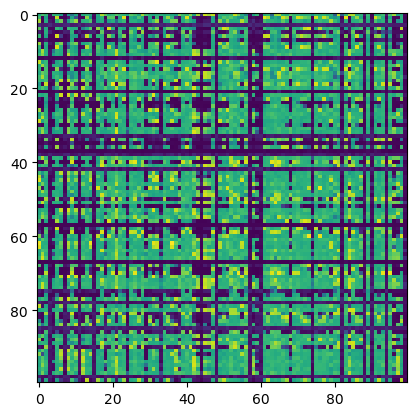

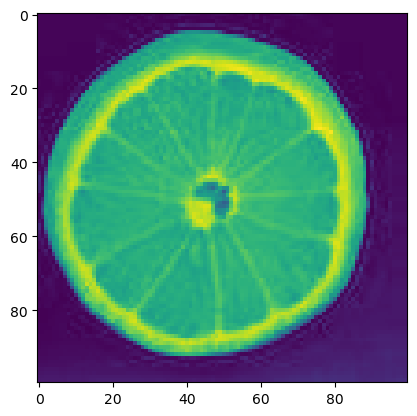

In [102]:
row, col = img_average_channel.shape
rows = np.arange(row)
cols = np.arange(col)

np.random.shuffle(rows)
np.random.shuffle(cols)

T_rows = np.eye(row)[rows, :]
T_cols = np.eye(col)[:, cols]

scrambled = np.dot(T_rows, img_average_channel)
scrambled_image = np.dot(scrambled, T_cols)
plt.imshow(scrambled_image)
plt.show()

T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)
scrambled_inv = np.dot(T_rows_inv, scrambled_image)
scramble_inv_image = np.dot(scrambled_inv, T_cols_inv)
plt.imshow(scramble_inv_image)
plt.show()